In [1]:
import pandas as pd
import numpy as np
import os


#from google.colab import drive 
import os
import pandas as pd
#drive.mount('/content/drive')
#os.chdir("/content/drive/Shared drives/Investment Theory Project Group") #Or your path
#!ls
%pylab inline
df = pd.read_csv('WRDS data.csv')

Populating the interactive namespace from numpy and matplotlib


In [2]:
df['adjusted prices'] = df['PRC'] / df['CFACPR']
df['date'] = pd.to_datetime(df['date'])

In [3]:
df

,PERMNO,date,TICKER,COMNAM,CUSIP,DIVAMT,SHRENDDT,PRC,VOL,RET,...,CFACPR,CFACSHR,ALTPRC,SPREAD,ALTPRCDT,RETX,vwretx,ewretx,sprtrn,adjusted prices
0,10000,1985-12-31,NaN,NaN,68391610,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,-2.56250,NaN,01/07/1986,NaN,0.040080,0.026355,0.045061,NaN
1,10000,1986-01-31,OMFGA,OPTIMUM MANUFACTURING INC,68391610,NaN,04/29/1986,-4.37500,1771.0,C,...,1.0,1.0,-4.37500,0.250,01/31/1986,C,0.008006,0.043082,0.002367,-4.37500
2,10000,1986-02-28,OMFGA,OPTIMUM MANUFACTURING INC,68391610,NaN,NaN,-3.25000,828.0,-0.257143,...,1.0,1.0,-3.25000,0.250,02/28/1986,-0.257143,0.068190,0.058938,0.071489,-3.25000
3,10000,1986-03-31,OMFGA,OPTIMUM MANUFACTURING INC,68391610,NaN,NaN,-4.43750,1078.0,0.365385,...,1.0,1.0,-4.43750,0.125,03/31/1986,0.365385,0.051360,0.045679,0.052794,-4.43750
4,10000,1986-04-30,OMFGA,OPTIMUM MANUFACTURING INC,68391610,NaN,07/30/1986,-4.00000,957.0,-0.098592,...,1.0,1.0,-4.00000,0.250,04/30/1986,-0.098592,-0.009633,0.015141,-0.014148,-4.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160587,93436,2019-08-30,TSLA,TESLA INC,88160R10,NaN,NaN,225.61000,1340932.0,-0.066222,...,1.0,1.0,225.61000,NaN,08/30/2019,-0.066222,-0.022301,-0.041599,-0.018092,225.61000
3160588,93436,2019-09-30,TSLA,TESLA INC,88160R10,NaN,10/20/2019,240.87000,1365915.0,0.067639,...,1.0,1.0,240.87000,NaN,09/30/2019,0.067639,0.014162,0.015359,0.017181,240.87000
3160589,93436,2019-10-31,TSLA,TESLA INC,88160R10,NaN,12/31/2019,314.92001,2351125.0,0.307427,...,1.0,1.0,314.92001,NaN,10/31/2019,0.307427,0.018094,0.005261,0.020432,314.92001
3160590,93436,2019-11-29,TSLA,TESLA INC,88160R10,NaN,NaN,329.94000,1578851.0,0.047695,...,1.0,1.0,329.94000,NaN,11/29/2019,0.047695,0.032961,0.024961,0.034047,329.94000


In [3]:
df = df[df['VOL'].notna()] # dropping null values for trading volume

In [4]:
agg_res = df.groupby(['date'])['VOL'].agg('sum') #grouping by trading volume and summing to get total trading volume per day
agg_res = pd.DataFrame(agg_res) #turning into df
agg_res.rename(columns = {'VOL': 'total trading vol'}, inplace = True) #renaming 

In [5]:
agg_res = agg_res.reset_index() # reseting to merge

In [6]:
merged_df = pd.merge(agg_res, df, on = 'date') # merging on date

In [7]:
merged_df['relative trading vol'] = merged_df['VOL'] / merged_df['total trading vol'] # getting relative trading volume

In [8]:
trading_volume_mask = merged_df['RETX'] != 'C' 
trading_volume = merged_df[trading_volume_mask]
trading_volume_mask_2 = merged_df['RETX'] != 'B' 
trading_volume = merged_df[trading_volume_mask]
trading_volume = trading_volume[trading_volume_mask_2]
trading_volume = trading_volume[trading_volume['RETX'].notna()] #dropping na
trading_volume = trading_volume[trading_volume['sprtrn'].notna()] #dropping na
trading_volume['RETX'] = trading_volume['RETX'].astype(float)
trading_volume['sprtrn'] = trading_volume['sprtrn'].astype(float)
trading_volume.head()

C:\Users\Admin\Downloads\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,date,total trading vol,PERMNO,TICKER,COMNAM,CUSIP,DIVAMT,SHRENDDT,PRC,VOL,...,CFACSHR,ALTPRC,SPREAD,ALTPRCDT,RETX,vwretx,ewretx,sprtrn,adjusted prices,relative trading vol
0,1985-01-31,51078840.0,10015,AMFD,A & M FOOD SERVICES INC,00016510,NaN,NaN,5.000,775.0,...,1.0,5.000,NaN,01/31/1985,0.311475,0.083506,0.120225,0.074085,5.000,0.000015
1,1985-01-31,51078840.0,10031,ANTQ,A A IMPORTING INC,00035410,NaN,NaN,-3.250,359.0,...,1.0,-3.250,0.5,01/31/1985,0.083333,0.083506,0.120225,0.074085,-3.250,0.000007
2,1985-01-31,51078840.0,10057,AMT,ACME CLEVELAND CORP,00462610,0.10000,NaN,18.625,5423.0,...,1.0,18.625,NaN,01/31/1985,0.432692,0.083506,0.120225,0.074085,18.625,0.000106
3,1985-01-31,51078840.0,10065,ADX,ADAMS EXPRESS CO,00621210,1.18000,NaN,16.500,2681.0,...,1.5,16.500,NaN,01/31/1985,0.063459,0.083506,0.120225,0.074085,11.000,0.000052
4,1985-01-31,51078840.0,10065,ADX,ADAMS EXPRESS CO,00621210,0.13452,NaN,16.500,2681.0,...,1.5,16.500,NaN,01/31/1985,0.063459,0.083506,0.120225,0.074085,11.000,0.000052


In [9]:
# Get MKT CAP
trading_volume['PR_ADJ'] = trading_volume['PRC']/trading_volume['CFACPR']
trading_volume['SHR_ADJ'] = trading_volume['SHROUT']*trading_volume['CFACSHR']
trading_volume['MKTCAP'] = abs(trading_volume['PRC'])*trading_volume['SHROUT']
trading_volume['MKTCAP'].min()

0.0

In [10]:
# drop the lowest 10% cap for each day

clean_df = pd.DataFrame()
for day in unique(trading_volume.date):
  tmp = trading_volume[trading_volume.date == day]
  n = round(len(tmp) * 0.9)
  clean_df = pd.concat([clean_df,tmp.sort_values(by='MKTCAP', ascending = False)[:n]])
clean_df.head() # the new df is excluing the lowest 10 % cap for each day

,date,total trading vol,PERMNO,TICKER,COMNAM,CUSIP,DIVAMT,SHRENDDT,PRC,VOL,...,ALTPRCDT,RETX,vwretx,ewretx,sprtrn,adjusted prices,relative trading vol,PR_ADJ,SHR_ADJ,MKTCAP
183,1985-01-31,51078840.0,12490,IBM,INTERNATIONAL BUSINESS MACHS COR,45920010,NaN,NaN,136.375,326625.0,...,01/31/1985,0.107614,0.083506,0.120225,0.074085,34.093750,0.006395,34.093750,2450744.0,8.355505e+07
130,1985-01-31,51078840.0,11850,XON,EXXON CORP,30231G10,NaN,NaN,48.000,223834.0,...,01/31/1985,0.066667,0.083506,0.120225,0.074085,6.000000,0.004382,6.000000,6264408.0,3.758645e+07
152,1985-01-31,51078840.0,12060,GE,GENERAL ELECTRIC CO,36960410,NaN,NaN,63.875,159707.0,...,01/31/1985,0.128035,0.083506,0.120225,0.074085,2.661458,0.003127,2.661458,10917024.0,2.905520e+07
155,1985-01-31,51078840.0,12079,GM,GENERAL MOTORS CORP,37044210,NaN,NaN,83.125,180859.0,...,01/31/1985,0.060606,0.083506,0.120225,0.074085,31.803488,0.003541,31.803488,630902.0,2.622186e+07
29,1985-01-31,51078840.0,10401,T,AMERICAN TELEPHONE & TELEG CO,00195750,NaN,NaN,20.375,550618.0,...,01/31/1985,0.044872,0.083506,0.120225,0.074085,14.818915,0.010780,14.818915,308238.0,2.093450e+07


In [11]:
clean_df['percentiles'] = pd.qcut(clean_df['relative trading vol'], \
                                           4,\
                                           labels = ['0-25', '25-50', '50-75', '75-100']) #creating quantiles
clean_df['percentiles'] = clean_df['percentiles'].astype(str) #changing to string variable

In [12]:
clean_df

,date,total trading vol,PERMNO,TICKER,COMNAM,CUSIP,DIVAMT,SHRENDDT,PRC,VOL,...,RETX,vwretx,ewretx,sprtrn,adjusted prices,relative trading vol,PR_ADJ,SHR_ADJ,MKTCAP,percentiles
183,1985-01-31,5.107884e+07,12490,IBM,INTERNATIONAL BUSINESS MACHS COR,45920010,NaN,NaN,136.37500,326625.0,...,0.107614,0.083506,0.120225,0.074085,34.093750,6.394527e-03,34.093750,2450744.0,8.355505e+07,75-100
130,1985-01-31,5.107884e+07,11850,XON,EXXON CORP,30231G10,NaN,NaN,48.00000,223834.0,...,0.066667,0.083506,0.120225,0.074085,6.000000,4.382128e-03,6.000000,6264408.0,3.758645e+07,75-100
152,1985-01-31,5.107884e+07,12060,GE,GENERAL ELECTRIC CO,36960410,NaN,NaN,63.87500,159707.0,...,0.128035,0.083506,0.120225,0.074085,2.661458,3.126676e-03,2.661458,10917024.0,2.905520e+07,75-100
155,1985-01-31,5.107884e+07,12079,GM,GENERAL MOTORS CORP,37044210,NaN,NaN,83.12500,180859.0,...,0.060606,0.083506,0.120225,0.074085,31.803488,3.540781e-03,31.803488,630902.0,2.622186e+07,75-100
29,1985-01-31,5.107884e+07,10401,T,AMERICAN TELEPHONE & TELEG CO,00195750,NaN,NaN,20.37500,550618.0,...,0.044872,0.083506,0.120225,0.074085,14.818915,1.077977e-02,14.818915,308238.0,2.093450e+07,75-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3086147,2019-12-31,1.455115e+09,15881,GASX,DIREXION SHARES E T F TRUST,25490K11,0.03595,12/31/2019,41.42000,17113.0,...,-0.454821,0.026200,0.040641,0.028590,41.420000,1.176058e-05,41.420000,400.0,1.656800e+04,25-50
3087092,2019-12-31,1.455115e+09,17412,MAGA,E T F SERIES SOLUTIONS,26922A62,0.62802,12/31/2019,28.73000,1063.0,...,0.007720,0.026200,0.040641,0.028590,28.730000,7.305263e-07,28.730000,575.0,1.651975e+04,0-25
3088056,2019-12-31,1.455115e+09,18555,GHSI,GUARDION HEALTH SCIENCES INC,40145Q20,NaN,NaN,0.22031,886265.0,...,0.038532,0.026200,0.040641,0.028590,0.220310,6.090685e-04,0.220310,74983.0,1.651950e+04,75-100
3085722,2019-12-31,1.455115e+09,15104,KCNY,KRANESHARES TRUST,50076770,0.06543,12/31/2019,32.70000,298.0,...,0.003068,0.026200,0.040641,0.028590,32.700000,2.047948e-07,32.700000,500.0,1.635000e+04,0-25


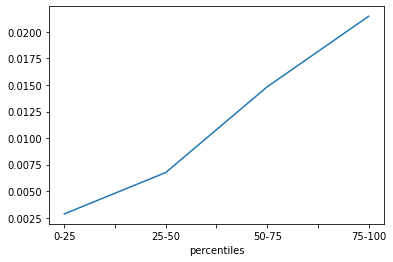

In [13]:
clean_df.groupby('percentiles').mean()['RETX'].plot()

In [ ]:
clean_df.to_csv('clean_df.csv')

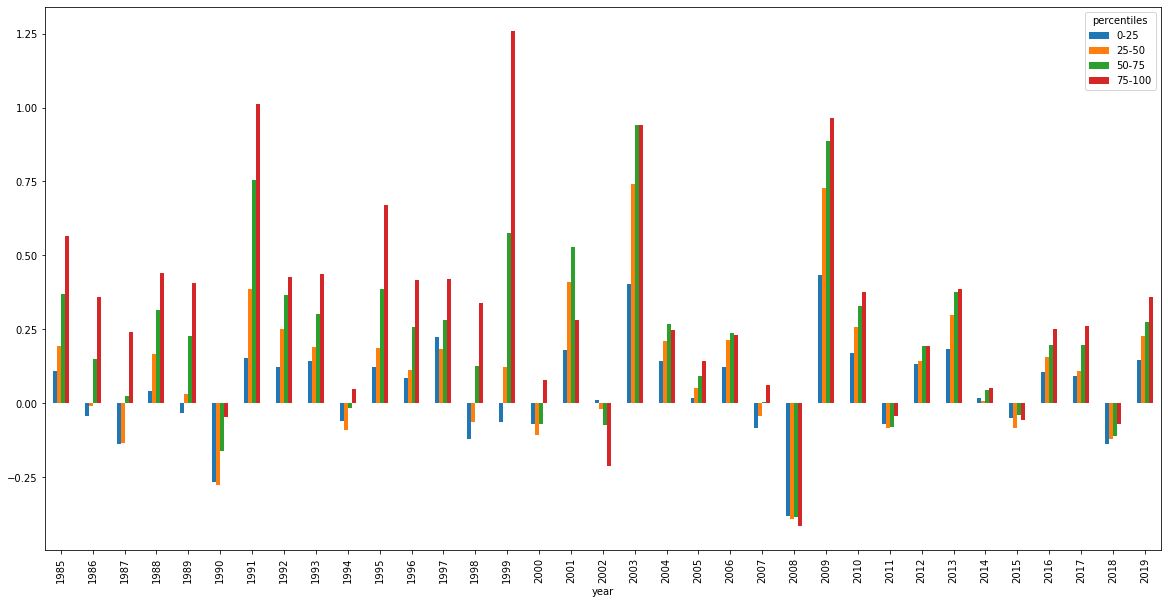

In [14]:
percentile_retx = clean_df.pivot_table(values='RETX',index='date',columns='percentiles').reset_index()
percentile_retx['year'] = pd.DatetimeIndex(percentile_retx['date']).year

def to_annual(s):
  return (1+s)**12 - 1

percentile_retx.groupby('year').mean().apply(to_annual).plot(kind='bar',figsize=(20,10))
#chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

[Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

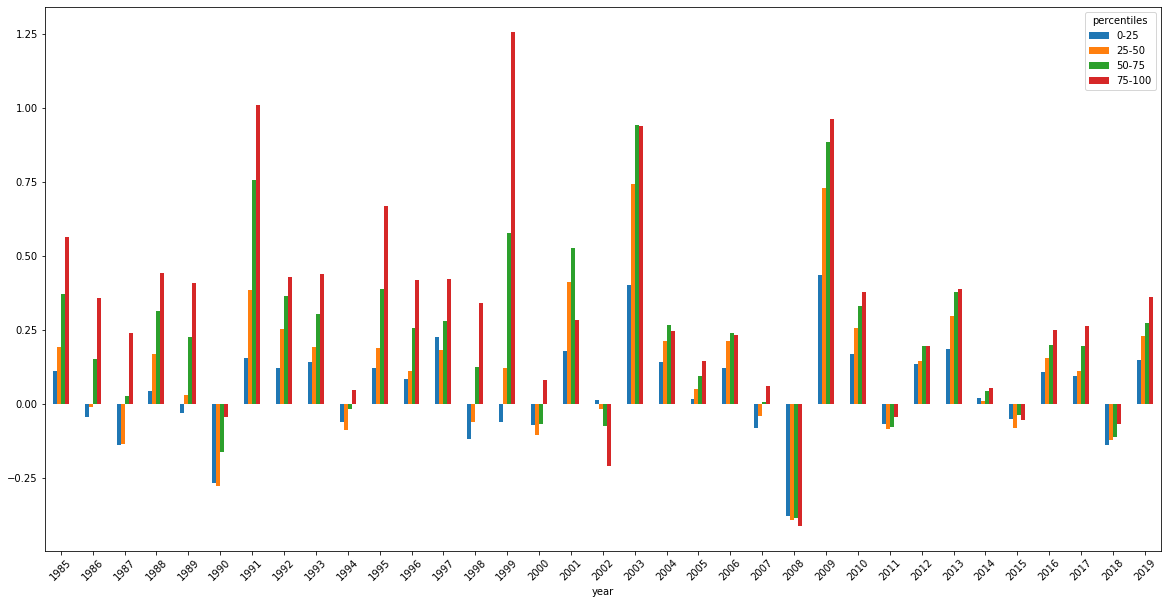

In [22]:
chart = percentile_retx.groupby('year').mean().apply(to_annual).plot(kind='bar',figsize=(20,10))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

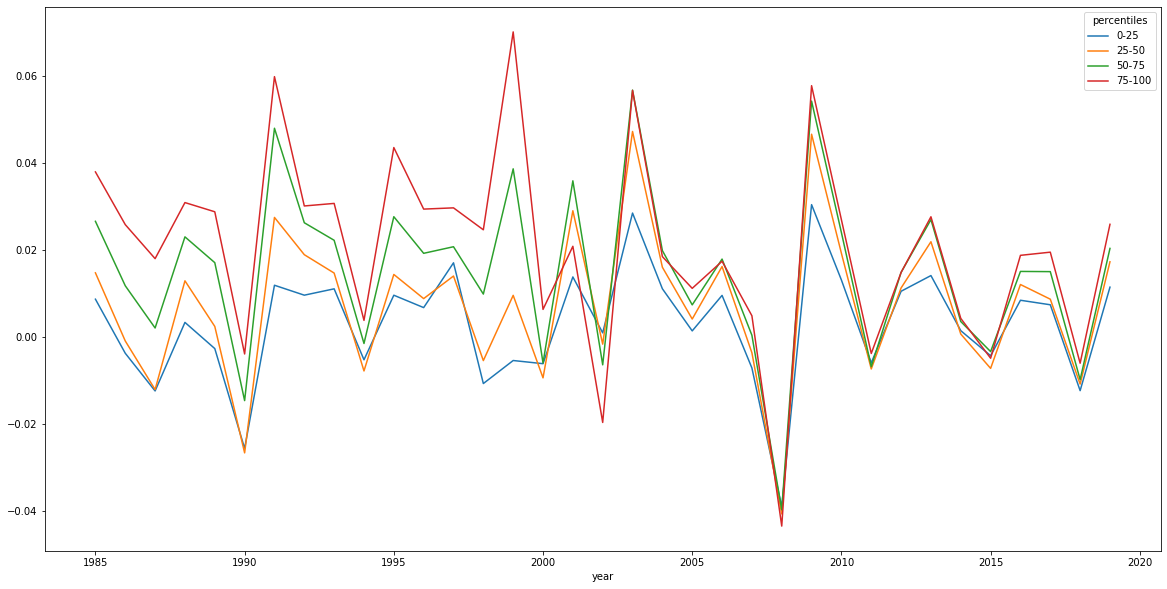

In [15]:
percentile_retx.groupby('year').mean().plot(figsize=(20,10))

In [16]:
((percentile_retx['75-100'] - percentile_retx['0-25']).mean() - 0 ) / (( percentile_retx['75-100'] - percentile_retx['0-25']).std()/math.sqrt(len(percentile_retx['75-100'])))

7.9098373564171105

In [ ]:
'''
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)
for i,j in zip(['0-25','25-50','50-75','75-100'],[ax1, ax2, ax3, ax4]):
  tmp = clean_df[clean_df.percentiles == i]
  j.scatter(tmp.date, tmp.RETX)
  j.set_title(i)
plt.figure(figsize=(20,20))
'''

In [17]:
clean_df['year'] = pd.DatetimeIndex(clean_df['date']).year
clean_df['month'] = pd.DatetimeIndex(clean_df['date']).month

In [18]:
top_200 = pd.DataFrame()
bottom_200 = pd.DataFrame()

for i in range(1985,2020):
  for j in range(1,13):
    top_200 = pd.concat([top_200,clean_df[(clean_df.year == i)&(clean_df.month == j)].sort_values(by='relative trading vol',ascending = False)[:200]])
    bottom_200 = pd.concat([bottom_200,clean_df[(clean_df.year == i)&(clean_df.month == j)].sort_values(by='relative trading vol',ascending = False)[:-200]])
top_200.to_csv('top_200.csv')
bottom_200.to_csv('bottom_200.csv')
top_200.head()

,date,total trading vol,PERMNO,TICKER,COMNAM,CUSIP,DIVAMT,SHRENDDT,PRC,VOL,...,ewretx,sprtrn,adjusted prices,relative trading vol,PR_ADJ,SHR_ADJ,MKTCAP,percentiles,year,month
29,1985-01-31,51078840.0,10401,T,AMERICAN TELEPHONE & TELEG CO,00195750,NaN,NaN,20.375,550618.0,...,0.120225,0.074085,14.818915,0.010780,14.818915,308238.0,20934497.50,75-100,1985,1
3268,1985-01-31,51078840.0,50404,MCIC,M C I COMMUNICATIONS CORP,55267310,NaN,NaN,9.875,440597.0,...,0.120225,0.074085,4.937500,0.008626,4.937500,469372.0,2317524.25,75-100,1985,1
183,1985-01-31,51078840.0,12490,IBM,INTERNATIONAL BUSINESS MACHS COR,45920010,NaN,NaN,136.375,326625.0,...,0.120225,0.074085,34.093750,0.006395,34.093750,2450744.0,83555053.25,75-100,1985,1
5571,1985-01-31,51078840.0,74625,TCOR,TANDON CORP,87291810,NaN,NaN,6.625,315792.0,...,0.120225,0.074085,6.625000,0.006182,6.625000,50802.0,336563.25,75-100,1985,1
326,1985-01-31,51078840.0,14593,AAPL,APPLE COMPUTER INC,03783310,NaN,NaN,29.000,284638.0,...,0.120225,0.074085,0.517857,0.005573,0.517857,3400544.0,1760996.00,75-100,1985,1


In [19]:
bottom_200.to_csv('bottom_200.csv')

In [20]:
top_200.to_csv('top_200.csv')

[Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '1997'),
 Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

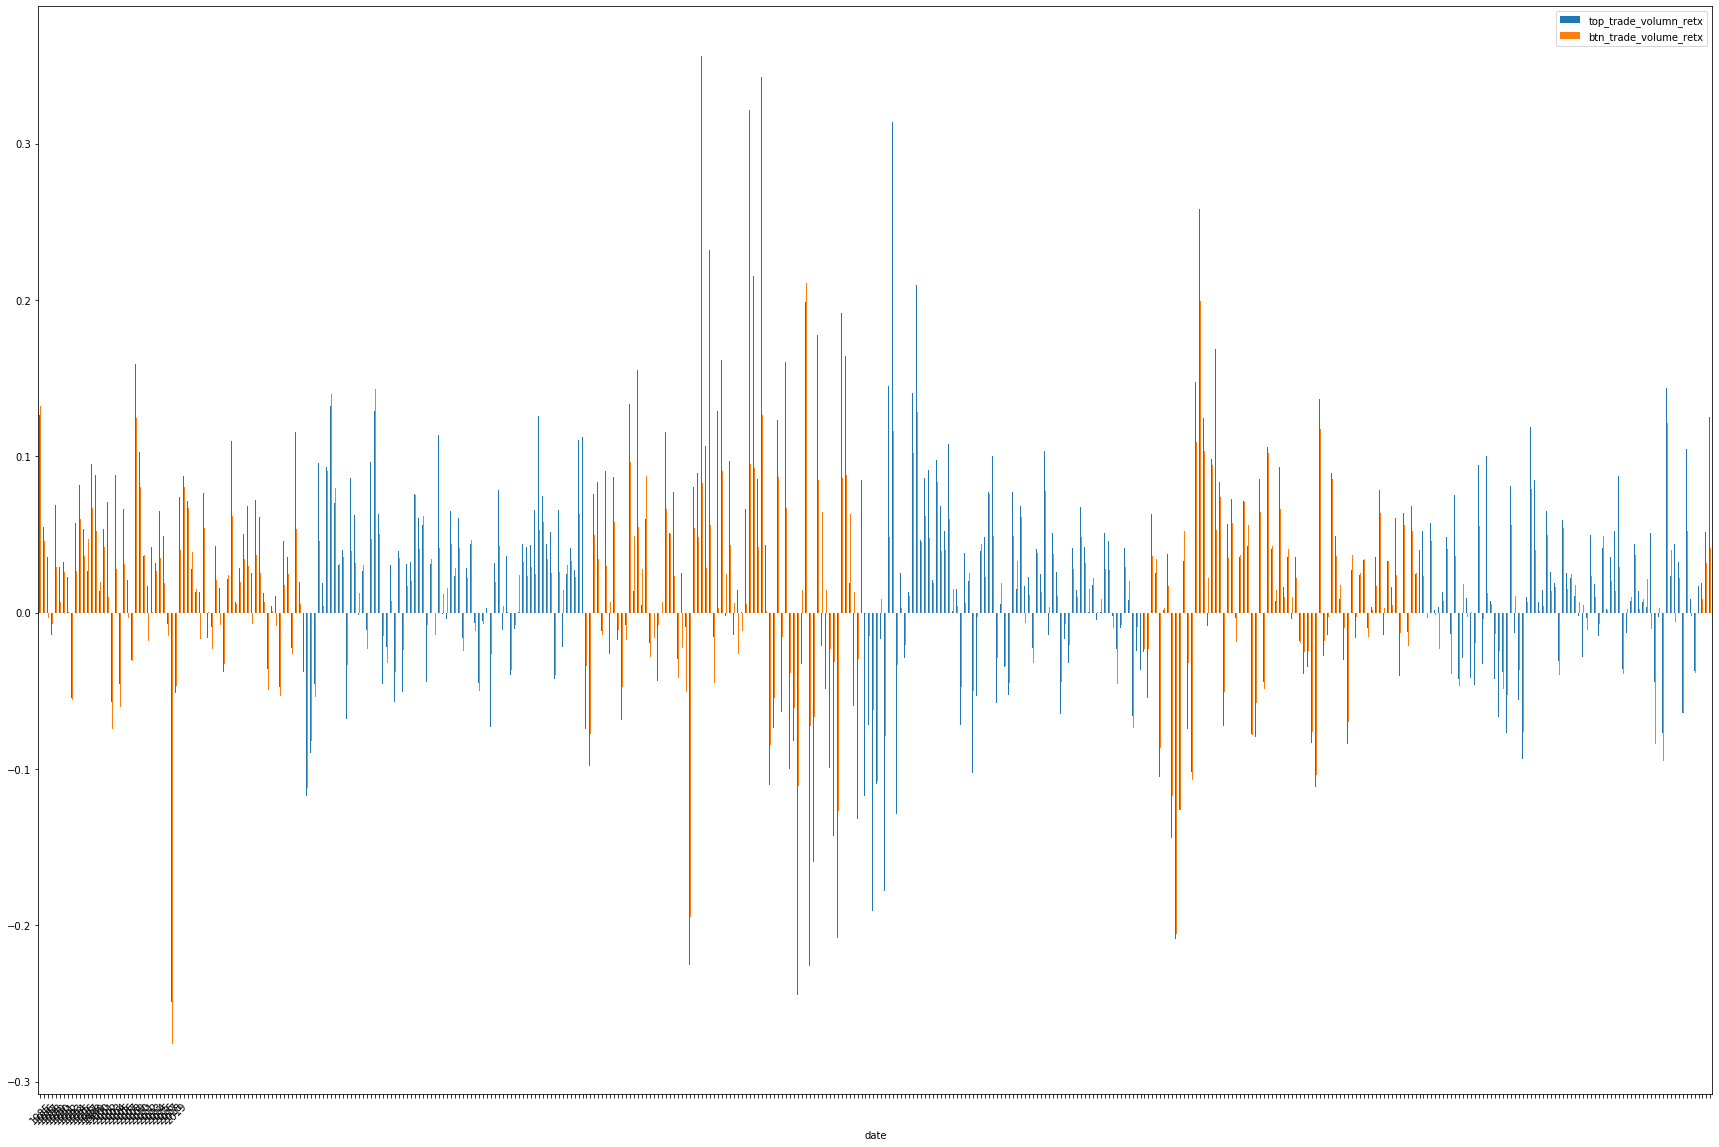

In [42]:
top_retx = top_200.rename(columns = {'RETX':'top_trade_volumn_retx'}).groupby('date').mean()['top_trade_volumn_retx']
btn_retx = bottom_200.rename(columns ={'RETX':'btn_trade_volume_retx'}).groupby('date').mean()['btn_trade_volume_retx']
chart_2 = pd.concat([top_retx,btn_retx],axis=1).plot(kind='bar',figsize=(30,20))
#chart = percentile_retx.groupby('year').mean().apply(to_annual).plot(kind='bar',figsize=(20,10))
chart_2.set_xticklabels(chart.get_xticklabels(), rotation=45)

In [58]:
#top_200_groupby = pd.DataFrame(top_200.groupby(['date'])['RETX'].std())

#top_200_groupby = top_200_groupby.reset_index()

std = pd.DataFrame(top_200_groupby.groupby(top_200_groupby.index.year).std())
std['annualized std'] = std['RETX'] * sqrt(12)


#for i in top_200_groupby['year']:
    #top_200_groupby['Standard Deviation'] = np.std(top_200_groupby['RETX'])

# plot data
#fig, ax = plt.subplots(figsize=(15,7))
#data.groupby(['date','type']).count()['amount'].unstack().plot(ax=ax)  
    

Text(0, 0.5, 'Standard Deviation')

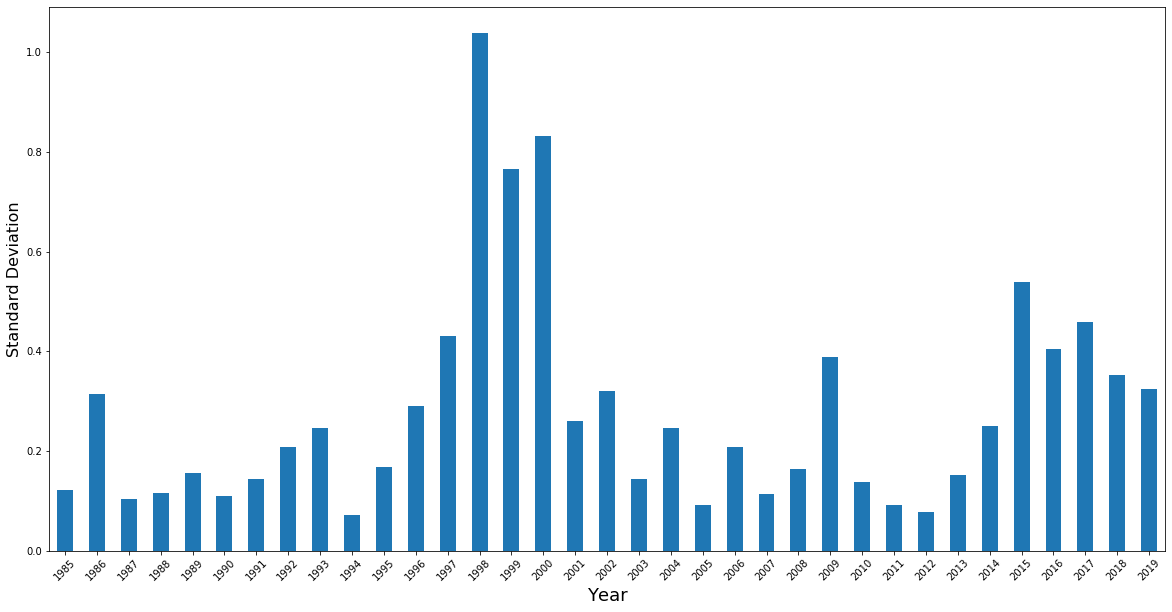

In [67]:
chart_3 = std['annualized std'].plot(kind='bar', figsize=(20,10))
chart_3.set_xticklabels(chart.get_xticklabels(), rotation=45)
#chart_3.set_ylabel('Standard Deviation')
chart_3.set_xlabel('Year', fontsize=18)
chart_3.set_ylabel('Standard Deviation', fontsize=16)

In [62]:
std

,RETX,annualized std
date,,
1985,0.035432,0.122740
1986,0.090738,0.314325
1987,0.030079,0.104197
1988,0.033471,0.115947
1989,0.044902,0.155546
1990,0.031860,0.110365
1991,0.041331,0.143174
1992,0.060256,0.208732
1993,0.071251,0.246822


In [52]:
top_200_groupby

,year,month,RETX,Standard Deviation
0,1985,1,0.195883,0.115964
1,1985,2,0.216483,0.115964
2,1985,3,0.168237,0.115964
3,1985,4,0.101098,0.115964
4,1985,5,0.121457,0.115964
...,...,...,...,...
415,2019,8,0.249549,0.115964
416,2019,9,0.198581,0.115964
417,2019,10,0.179760,0.115964
418,2019,11,0.347051,0.115964


In [23]:
(top_retx.mean()+1)**12-1

0.2771195055387079

In [24]:
(btn_retx.mean()+1)**12-1

0.15290185713382742

In [36]:
np.std(btn_retx)*sqrt(12)

0.18013234256986288

In [37]:
np.std(top_retx)*sqrt(12)

0.27245327714259526

In [41]:
bottom_200['RETX'].std()

0.16755401173873521

C:\Users\Admin\Downloads\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Returns')

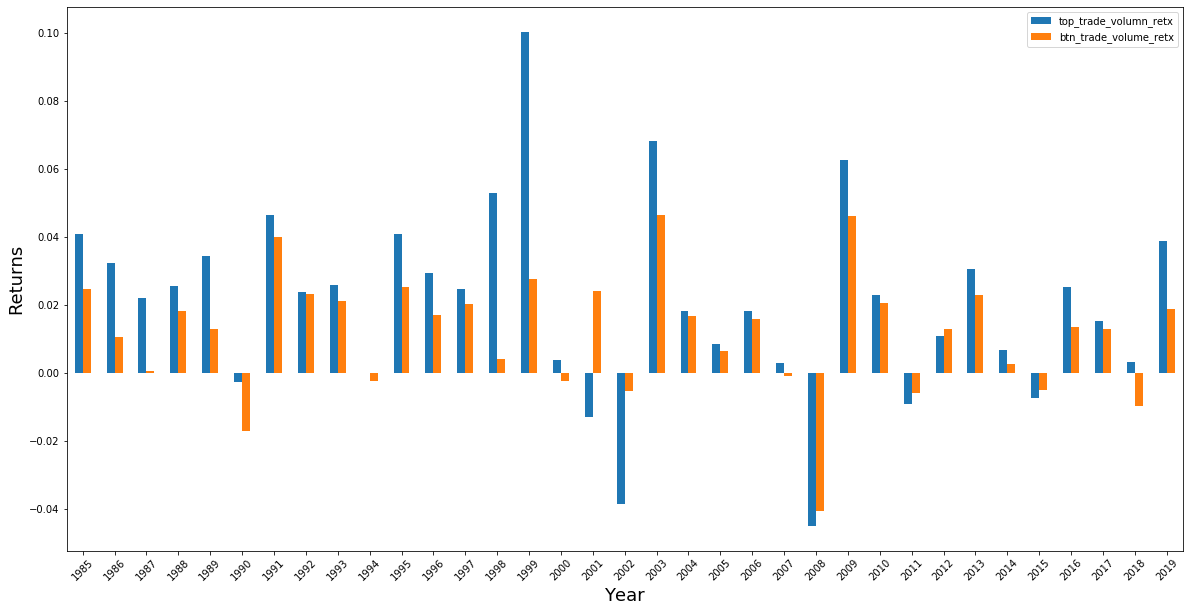

In [73]:
diff = pd.concat([top_retx,btn_retx],axis=1).reset_index()
diff['year'] = pd.DatetimeIndex(diff['date']).year
chart_2 = diff.groupby('year')['top_trade_volumn_retx','btn_trade_volume_retx'].mean().plot(kind='bar',figsize=(20,10))
chart_2.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart_2.set_xlabel('Year', fontsize=18)
chart_2.set_ylabel('Returns', fontsize=18)

In [ ]:
((diff['top_trade_volumn_retx'] - diff['btn_trade_volume_retx']).mean() - 0 ) / (( diff['top_trade_volumn_retx'] - diff['btn_trade_volume_retx']).std()/math.sqrt(len(diff['top_trade_volumn_retx'])))

In [ ]:
for i in range(1985,2020):
  for j in range(1,13):
    top_200 = pd.concat([top_200,clean_df[(top_200.year == i)&(clean_df.month == j)].sort_values(by='relative trading vol',ascending = False)[:200]])
    bottom_200 = pd.concat([bottom_200,clean_df[(clean_df.year == i)&(clean_df.month == j)].sort_values(by='relative trading vol',ascending = False)[:-200]])

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'float'

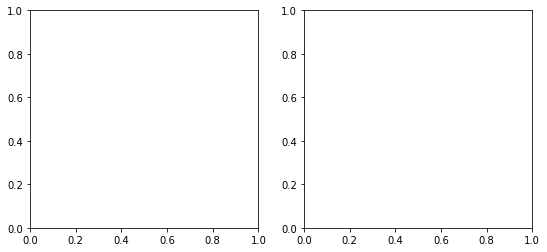

In [77]:
import matplotlib.pyplot as plt
import numpy as np
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))


axs[1].boxplot(top_200)
axs[1].set_title('Box plot of returns')

# adding horizontal grid lines
for ax in axs:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(top_200))])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

# add x-tick labels
#plt.setp(axs, xticks=[y + 1 for y in range(len(top_200))],
         #xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

In [88]:
top_200_boxplot = top_200[['RETX', 'year']]

top_200_boxplot = top_200_boxplot.reset_index()
top_200_boxplot = top_200_boxplot.set_index('year')

In [92]:
top_200_boxplot = top_200_boxplot.drop(['index'], axis=1)

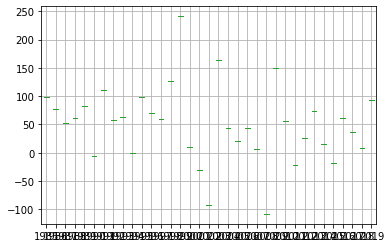

In [108]:
#top_200_boxplot_t = top_200_boxplot.transpose()
#top_200_boxplot_t.groupby(level=0).sum()
top_200_boxplot.groupby(level=0, axis=0).sum().transpose().boxplot()

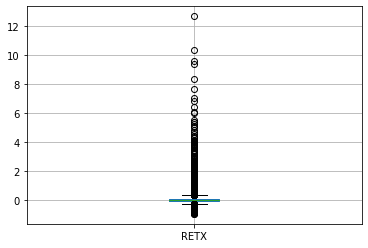

In [93]:
#top_200_boxplot = top_200['RETX', 'year']

top_200_boxplot.boxplot()
#Show the boxplots. This is just for 3 columns out of 50
plt.show()

In [ ]:
tmp = []
for i in unique(top_200.date):
  i


In [ ]:
chart_2 = diff.groupby('year')['top_trade_volumn_retx','btn_trade_volume_retx'].mean().plot(kind='bar',figsize=(20,10))
chart_2.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart_2.set_xlabel('Year', fontsize=18)
chart_2.set_ylabel('Returns', fontsize=18)